In [1]:
import pandas as pd

In [8]:
exfil = pd.concat([pd.read_csv('exfil_icmp.csv'), pd.read_csv('exfil_ssh.csv'), pd.read_csv('exfil_tcp.csv')])
exfil['Label'] = 'Data Exfiltration'
exfil = exfil.sample(frac=1, random_state=29)

recon = pd.concat([pd.read_csv('nmap_t1_sS_f.csv'), pd.read_csv('nmap_sV_t4_sS.csv'), pd.read_csv('nmap_t2_F.csv'), pd.read_csv('nmap_t2_small_f.csv')])
recon['Label'] = 'Reconnaissance'

foothold = pd.concat([pd.read_csv('hydra_ftp.csv'), pd.read_csv('hydra_ssh.csv')])
foothold['Label'] = 'Establish Foothold'

df = pd.concat([exfil[:5500], recon, foothold])

<Axes: >

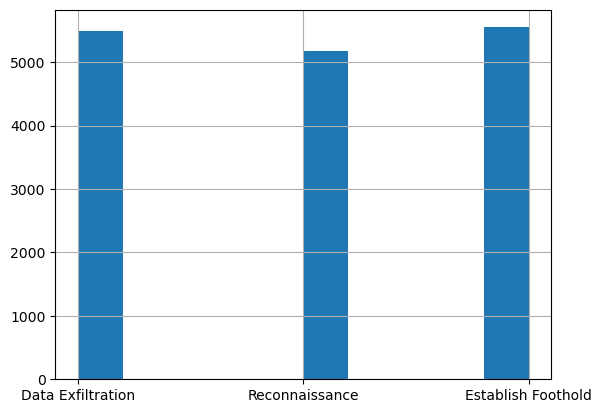

In [9]:
df['Label'].hist()

In [10]:
df = df.sample(frac=1, random_state=29)

In [11]:
len(df) * 0.75

12171.75

In [12]:
df_train = df[:12100]
df_test = df[12100:]

In [13]:
df_train.to_csv('persistent_testbed_train.csv')
df_test.to_csv('persistent_testbed_test.csv')